since the dataset is reasonably big ~150 mb, this project will use features from pyarrow for faster data manipulation

In [1]:
import pandas as pd 
import pyarrow.feather as feather

In [2]:
df = pd.read_csv('../datasets/raw/creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
df = pd.read_feather('../datasets/processed/creditcard.feather')

overview of the dataset: shape, number of columns, datatypes

In [21]:
df.shape

(284807, 31)

In [19]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [38]:
for col in df.columns[:-1]:
    print(df[col].value_counts())

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
172760.0     1
172758.0     1
172757.0     1
172756.0     1
172754.0     1
Name: count, Length: 124592, dtype: int64
V1
 1.245674    77
 2.055797    77
 2.053311    62
 1.302378    60
 2.040211    53
             ..
-0.781167     1
-1.131880     1
 1.266063     1
-0.655628     1
 1.172238     1
Name: count, Length: 275663, dtype: int64
V2
 0.166975    77
-0.326668    77
 0.089735    62
-0.606529    60
-0.146975    53
             ..
 0.504518     1
 1.953131     1
-0.321886     1
 0.825561     1
-1.619032     1
Name: count, Length: 275663, dtype: int64
V3
 0.488306    77
-2.752041    77
-1.681836    62
-0.681986    60
-2.955934    53
             ..
 0.721449     1
 0.580652     1
-0.613943     1
 1.470057     1
 0.652451     1
Name: count, Length: 275663, dtype: int64
V4
 0.635322    77
-0.842316    77
 0.454212    62
-1.904603    60
-0.578356    53
             ..
-1.961132     1
 2.591218 

descriptive statistics: variance, median, mode, quartiles

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.384974e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.494498e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.414189e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [40]:
df.var()

Time      2.255124e+09
V1        3.836489e+00
V2        2.726820e+00
V3        2.299029e+00
V4        2.004684e+00
V5        1.905081e+00
V6        1.774946e+00
V7        1.530401e+00
V8        1.426479e+00
V9        1.206992e+00
V10       1.185594e+00
V11       1.041855e+00
V12       9.984034e-01
V13       9.905708e-01
V14       9.189055e-01
V15       8.378034e-01
V16       7.678191e-01
V17       7.213734e-01
V18       7.025394e-01
V19       6.626619e-01
V20       5.943254e-01
V21       5.395255e-01
V22       5.266428e-01
V23       3.899507e-01
V24       3.668084e-01
V25       2.717308e-01
V26       2.325429e-01
V27       1.629192e-01
V28       1.089550e-01
Amount    6.256007e+04
Class     1.724507e-03
dtype: float64

In [43]:
df.mode().T

,0,1
Time,163152.000000,NaN
V1,1.245674,2.055797
V2,-0.326668,0.166975
V3,-2.752041,0.488306
V4,-0.842316,0.635322
V5,-0.562777,2.463072
V6,-1.011073,3.173856
V7,-0.432126,0.014953
V8,-0.160211,0.727706
V9,0.170362,0.608606


In [45]:
df.median().T

Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64

cleaning and preprocessing the data

In [56]:
print(df.isnull().sum())  # missing values per column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [57]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
mask = df.duplicated()
print(df[mask])

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [64]:
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

np.int64(0)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

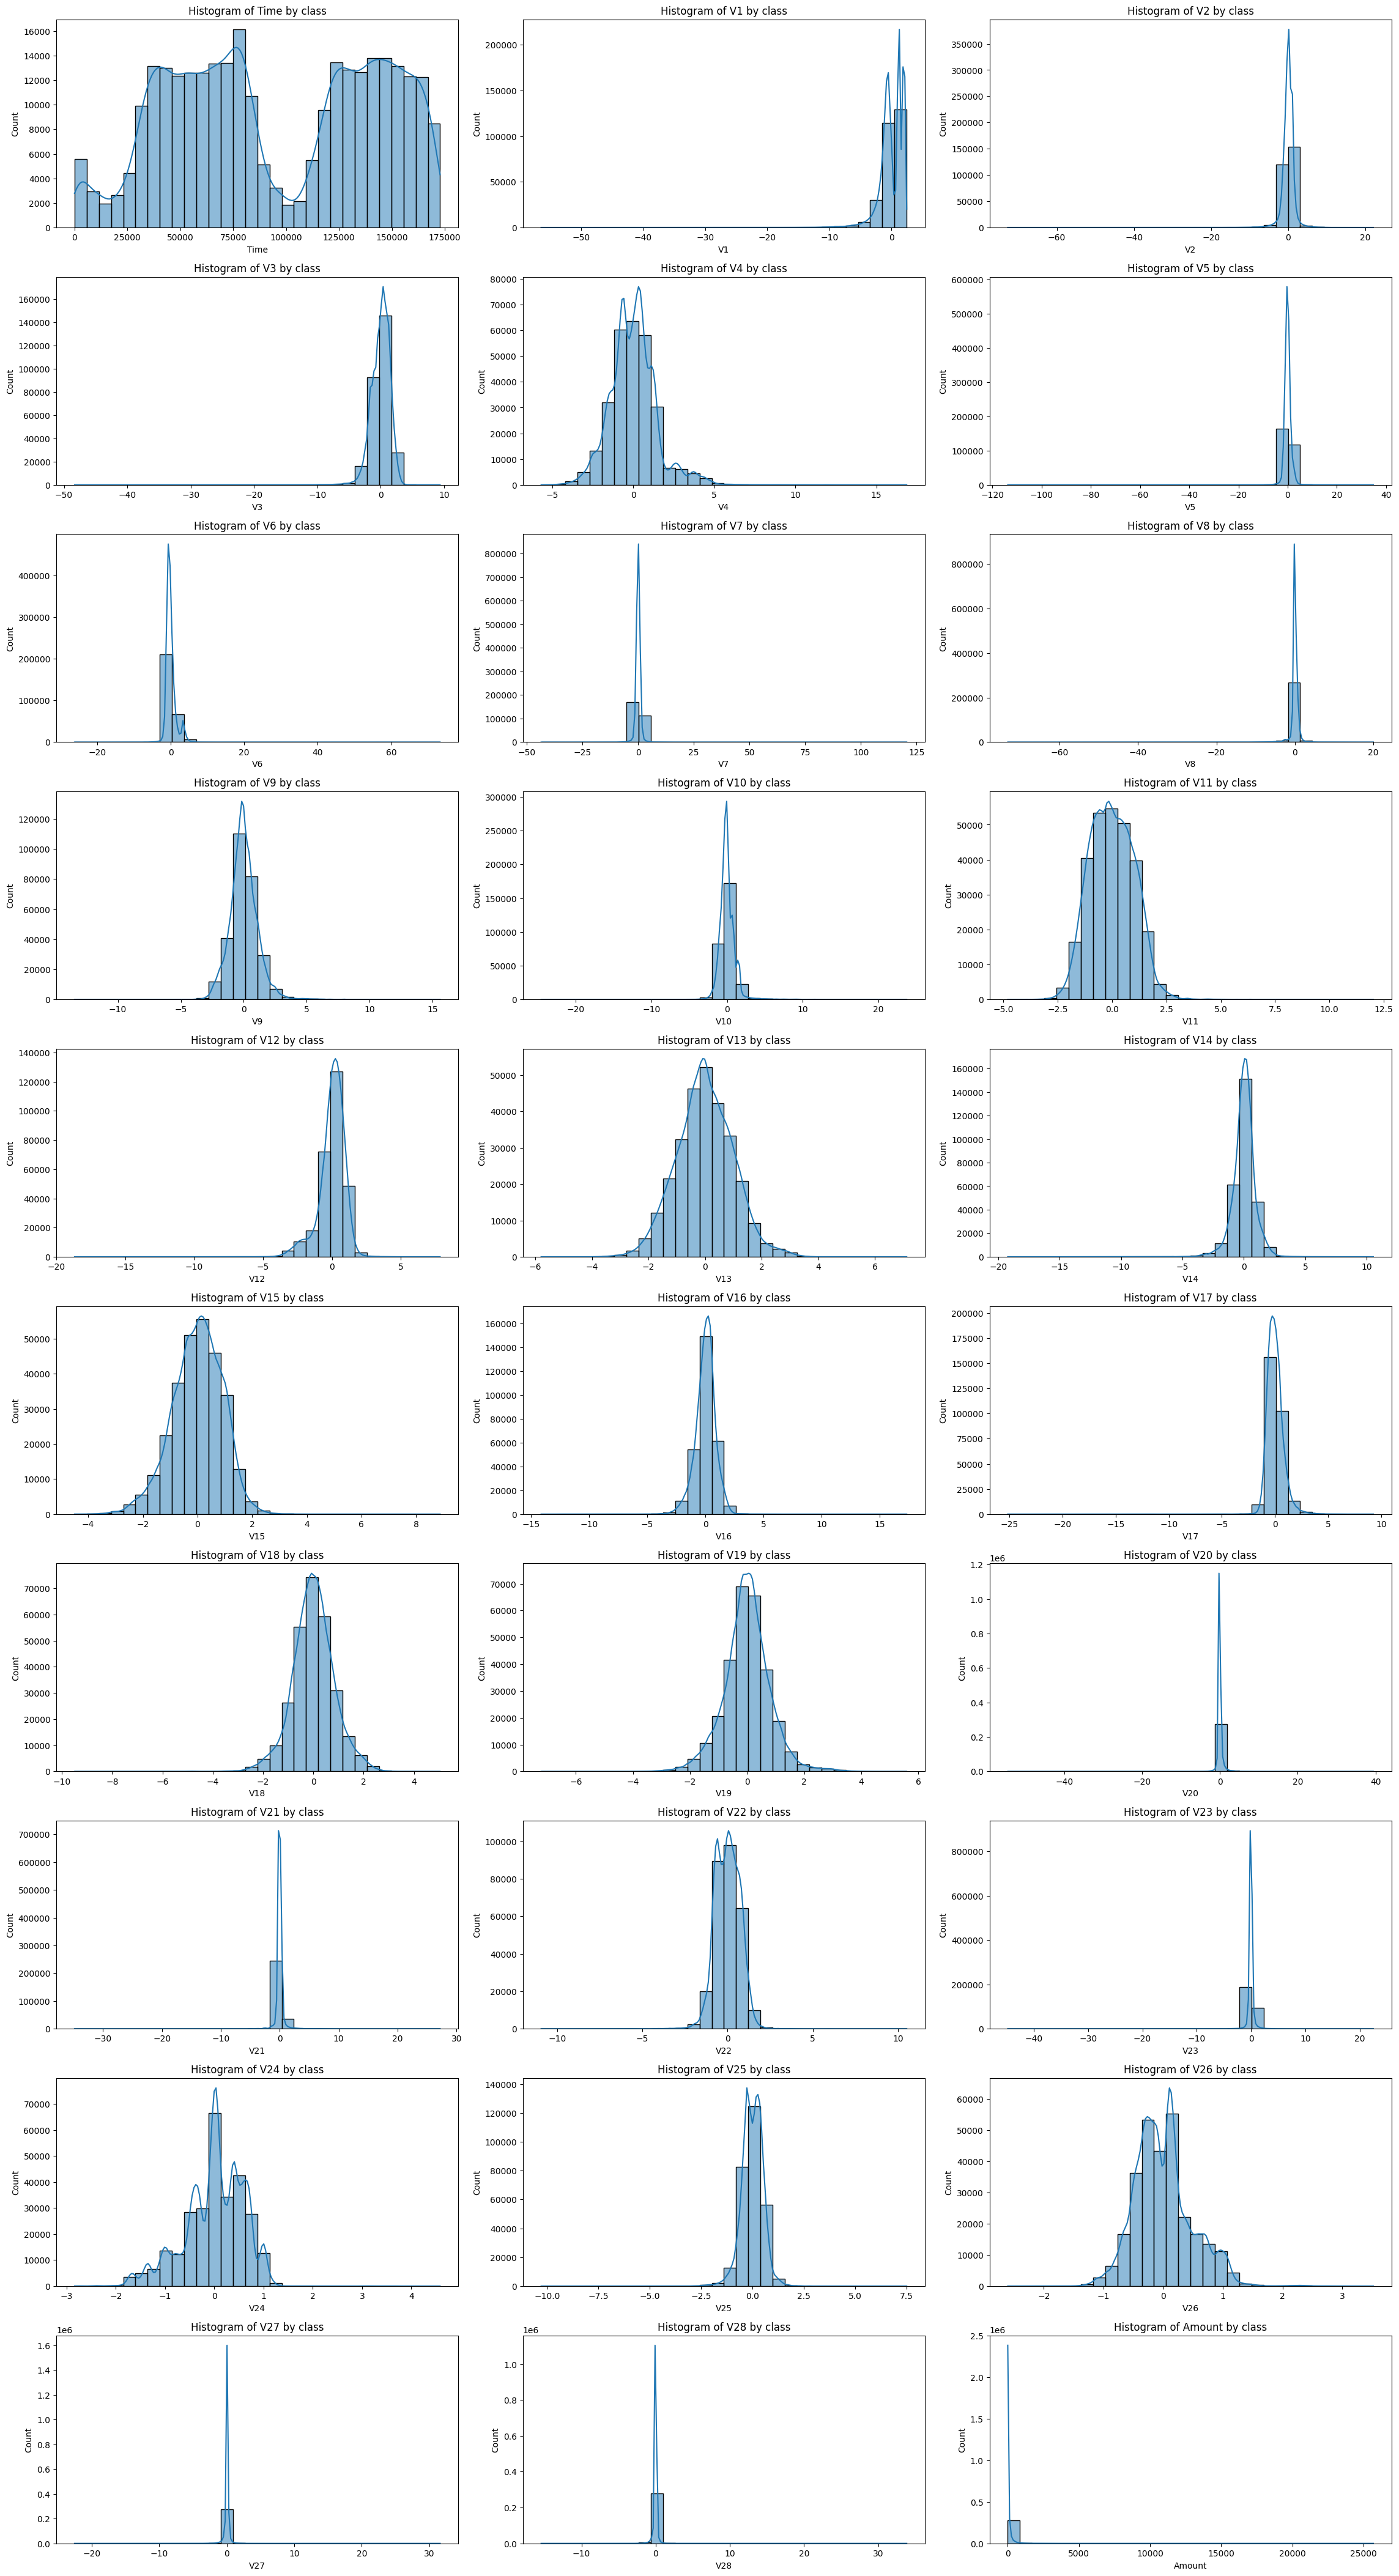

In [ ]:
plt.figure(figsize=(23, 46))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)  # i starts from 0
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col} by class")

plt.tight_layout()
plt.plot()

More notably, 'Time' and 'V24, 'V26' attributes are multimodal, and the rest seem to follow a normal distribution
with varying degrees of variance: small, for example 'V6', 'V8', 'V10' or bigger: 'V11', 'V13', 'V15'

[]

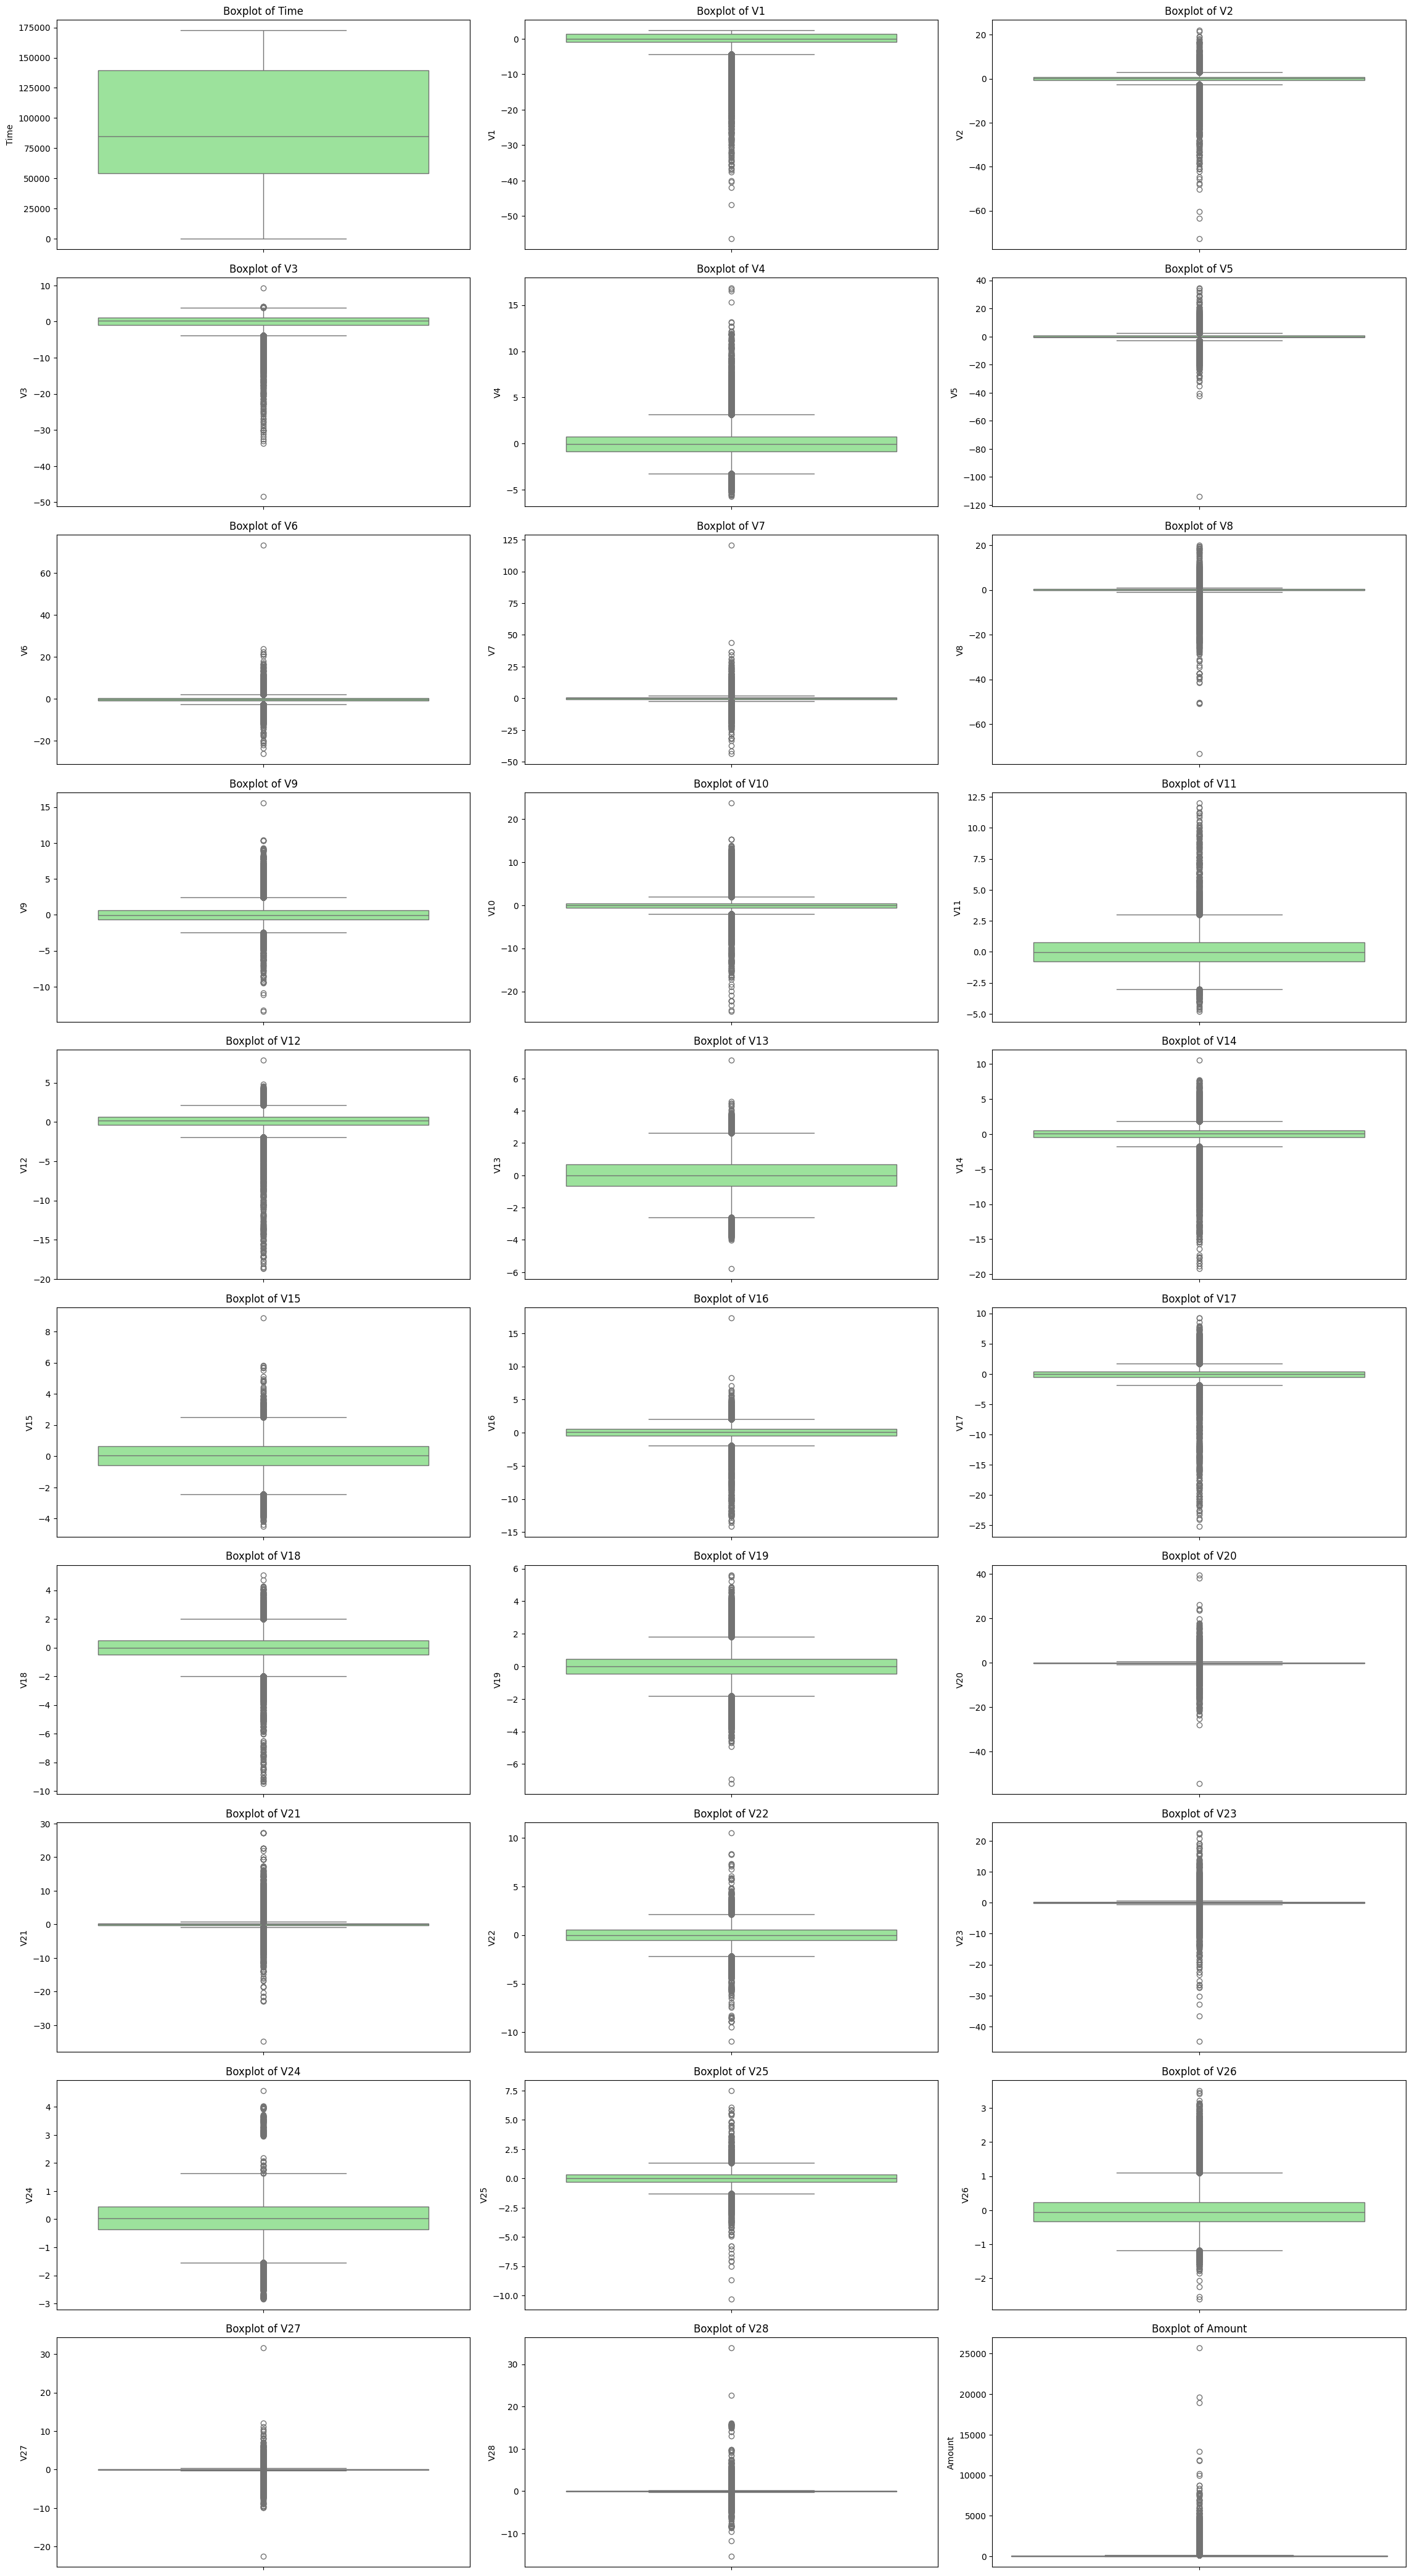

In [11]:
plt.figure(figsize=(23, 46))

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=col, data=df, color='lightgreen')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.plot()

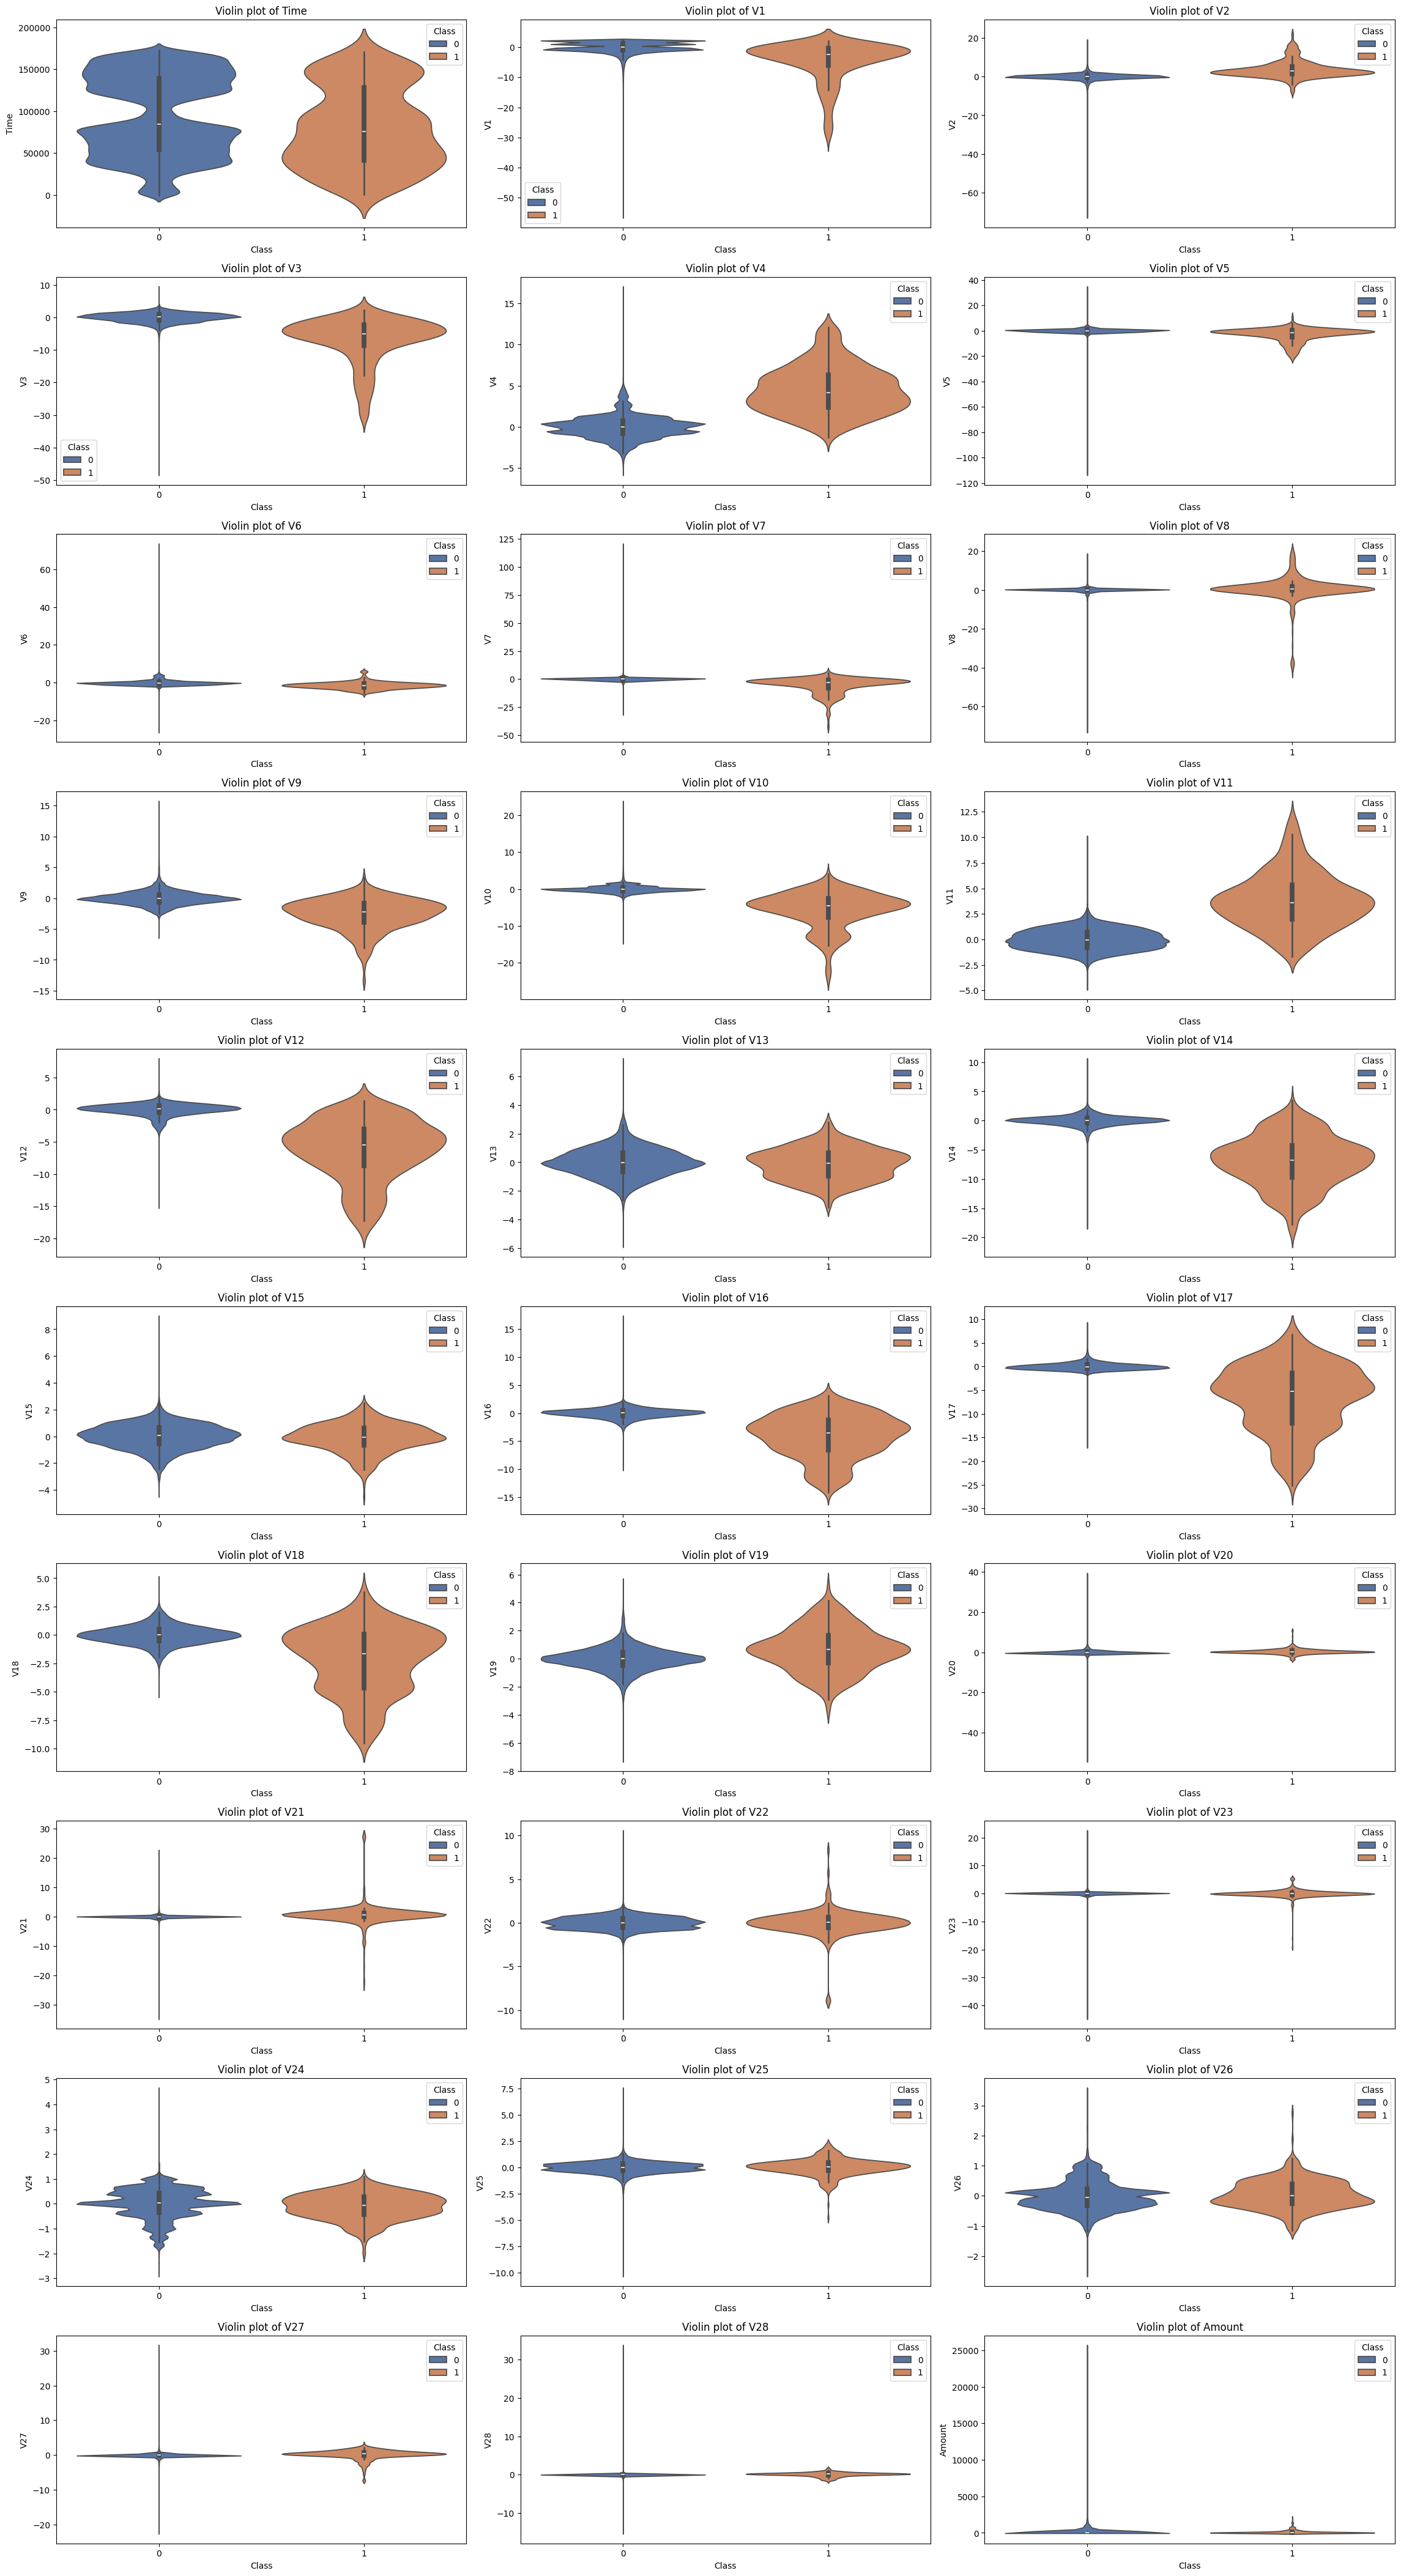

In [6]:
plt.figure(figsize=(23, 46))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)
    sns.violinplot(x='Class', hue='Class', y=col, data=df, palette="deep")  # palette = "muted"
    plt.title(f"Violin plot of {col}")

plt.tight_layout()
plt.show()

'Time' has a different KDEs based each class, and 'V1', 'V3', 'V10', 'V12', 'V16', 'V17', 'V18' have more outliers for the fraudulent class (0).

HeatMap

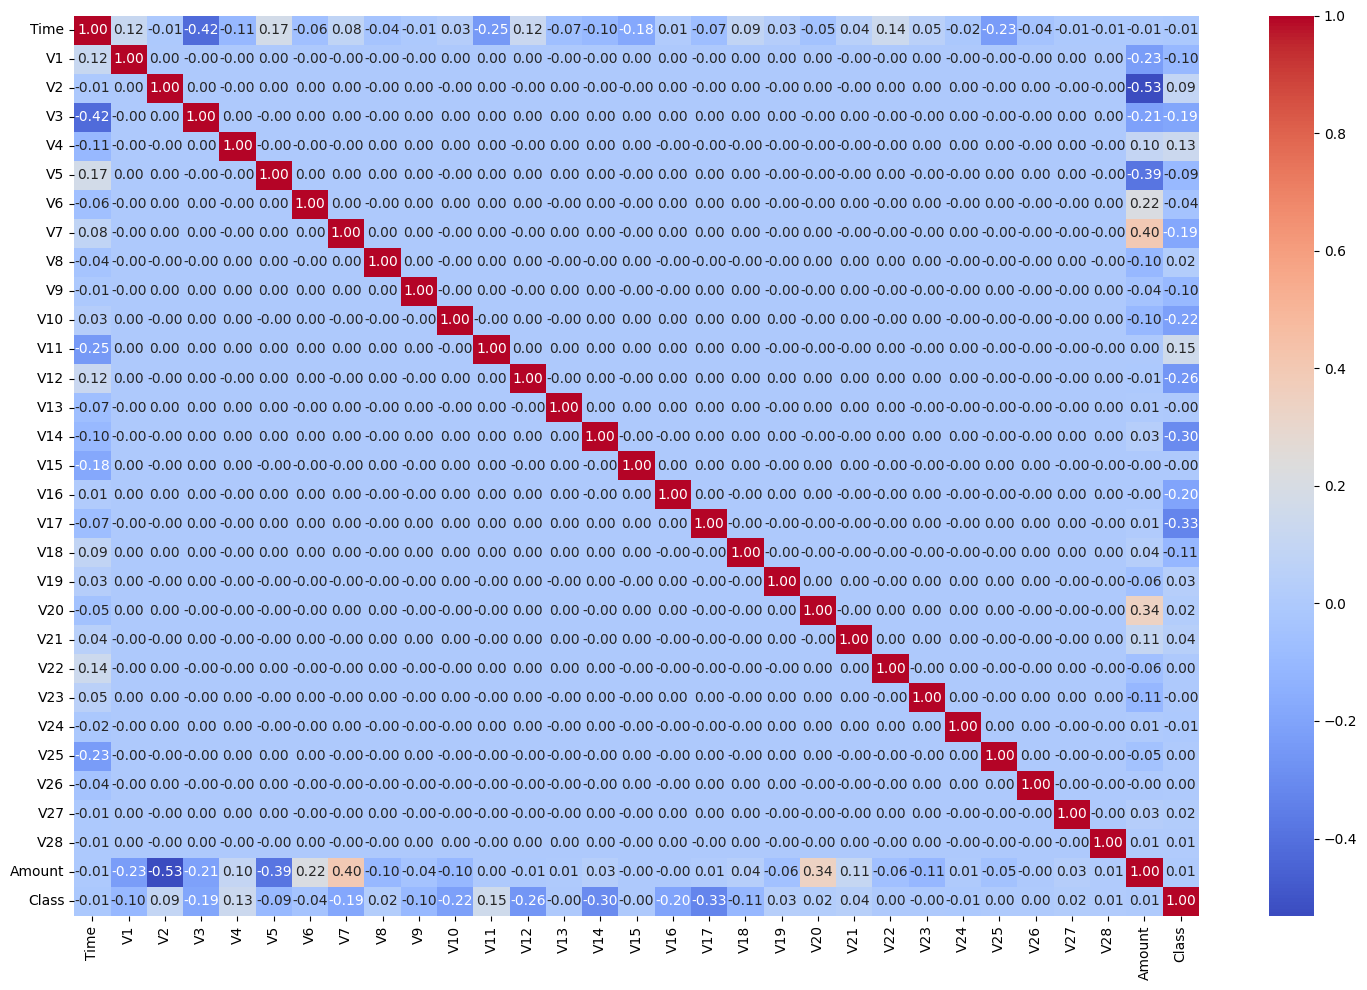

In [35]:
correlations = df.corr()
plt.figure(figsize=(15,10))

sns.heatmap(correlations, cmap='coolwarm', fmt='.2f', annot=True)
plt.tight_layout()
plt.show()

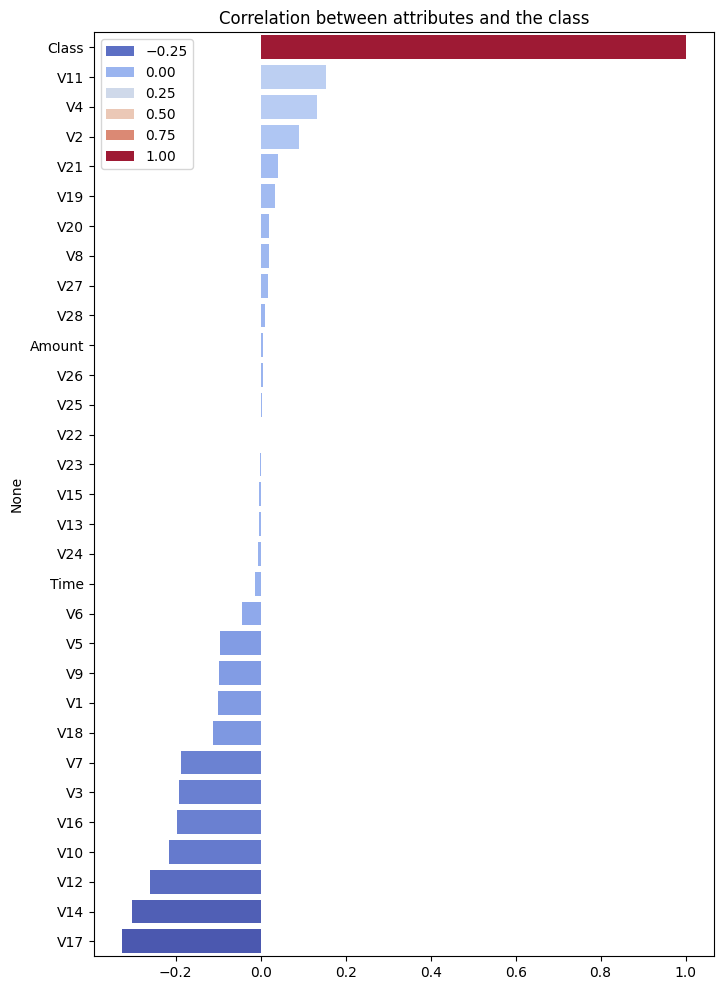

In [40]:
class_correlation = correlations['Class'].sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=class_correlation.values, hue=class_correlation.values, y=class_correlation.index, palette='coolwarm')
plt.title('Correlation between attributes and the class')
plt.show()

The most (positively or negatively) correlated 3-4 attributes may be used for anomaly detection, especially when inspecting that cluster parameters: mean and covariance for those dimensions.

Data standardization: mean = 0, stdDev = 1, and save it 

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.iloc[:, :-1]
Y = df.iloc[:, -1:]
X_scaled = scaler.fit_transform(X)  # X_scaled is now a numpy 2d array

In [11]:
df = pd.DataFrame(X_scaled, columns=[col for col in df.columns[:-1]])
df['Class'] = Y

df.to_feather('../datasets/processed/creditcard_standardized.feather')